# Load libraries 

In [23]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score,  confusion_matrix
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

# load data ,  show some samples 

In [9]:
# Path to your dataset
data_dir = '/workspaces/PRODIGY_ML_03/dogs-vs-cats-sample'

# Load and display the first 5 images
images = []
filenames = os.listdir(data_dir)

for file in filenames:
    img_path = os.path.join(data_dir, file)
    img = cv2.imread(img_path)
    if img is not None:
        img = cv2.resize(img, (128, 128))  # Resize for consistent shape
        img_flat = img.flatten()  # Flatten image to 1D
        images.append(img_flat)
    else:
        print(f"Could not read {file}")


# Preprocessing Images 

In [10]:
# Convert to NumPy array
images = np.array(images)

images_scaler = MinMaxScaler() # the default range is [0,1]
transformed = images_scaler.fit_transform(images)
print('{}\n'.format(repr(transformed)))

array([[0.49606299, 0.36220472, 0.2992126 , ..., 0.27952756, 0.32677165,
        0.3503937 ],
       [0.36220472, 0.31496063, 0.29133858, ..., 0.49606299, 0.44488189,
        0.47244094],
       [0.34251969, 0.52362205, 0.59448819, ..., 0.51574803, 0.48031496,
        0.49606299],
       ...,
       [0.97637795, 0.96850394, 0.97637795, ..., 0.97637795, 0.97637795,
        0.97637795],
       [0.76377953, 0.81889764, 0.90944882, ..., 0.33464567, 0.4015748 ,
        0.35826772],
       [0.74015748, 0.82283465, 0.81889764, ..., 0.17716535, 0.11417323,
        0.18897638]], shape=(100, 49152))



In [11]:
# Display results
print("Original Shape:", images.shape)
print("Transformed Shape:", transformed.shape)
print("First Transformed Image (flattened):\n", transformed[0])

Original Shape: (100, 49152)
Transformed Shape: (100, 49152)
First Transformed Image (flattened):
 [0.49606299 0.36220472 0.2992126  ... 0.27952756 0.32677165 0.3503937 ]


# label images

In [12]:
labels = np.array([0 if 'dog' in file.lower() else 1 for file in filenames])

print(f"Total images: {len(filenames)}")
print(f"First 10 filenames: {filenames[:10]}")
print(f"First 10 labels: {labels[:10]}")

Total images: 100
First 10 filenames: ['dog.7677.jpg', 'cat.7981.jpg', 'cat.6680.jpg', 'cat.9891.jpg', 'dog.9629.jpg', 'cat.10108.jpg', 'cat.119.jpg', 'dog.4934.jpg', 'dog.4427.jpg', 'dog.3416.jpg']
First 10 labels: [0 1 1 1 0 1 1 0 0 0]


# Split Data

In [13]:
features = np.array(images)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    features, labels, test_size=0.3, random_state=42
)

# Model Classifier 

In [16]:
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

# prediction

In [17]:
y_pred = svm_model.predict(X_test)

# Show Predictions 

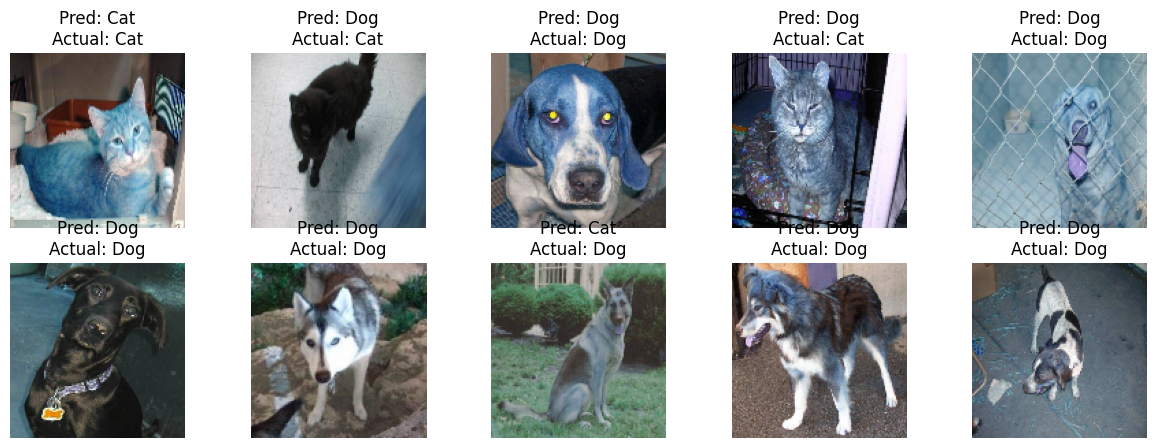

In [21]:
plt.figure(figsize=(15, 5))
for i in range(10):  # Show first 10 predictions
    plt.subplot(2, 5, i+1)
    plt.imshow(X_test[i].reshape(128, 128, 3).astype(np.uint8))
    plt.title(f"Pred: {'Dog' if y_pred[i] == 0 else 'Cat'}\nActual: {'Dog' if y_test[i] == 0 else 'Cat'}")
    plt.axis('off')
plt.show()

# Print Detailed Classification Report

In [22]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

print("Classification Report:\n", classification_report(y_test, y_pred))

Model Accuracy: 0.60
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.59      0.62        17
           1       0.53      0.62      0.57        13

    accuracy                           0.60        30
   macro avg       0.60      0.60      0.60        30
weighted avg       0.61      0.60      0.60        30



# Confusion Matrix

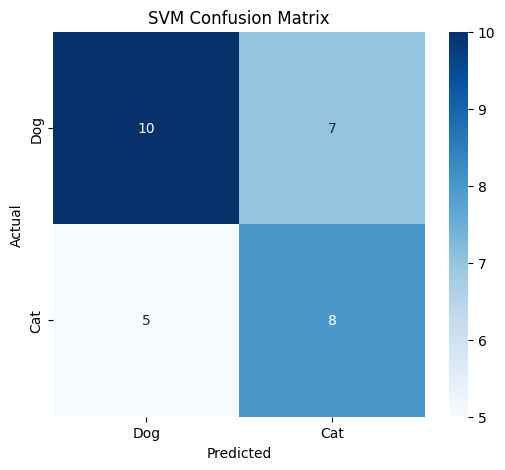

In [24]:
plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Dog', 'Cat'], yticklabels=['Dog', 'Cat'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SVM Confusion Matrix')
plt.show()